# test-8

LogCircular 1:100 GO (FLUX)

9 gen 2024 but at 23 dic 2024

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0   5760   5820 2.5429110493e+01 1.6302386256e+00 2.2218827840e+03   
1      1   5907   6020 1.7105175109e+01 1.0571759947e+00 1.8506747645e+03   
2      2   6195   6393 1.0502294443e+01 6.1680343915e-01 1.5022275051e+03   
3      3   6516   6830 9.2879590339e+00 5.4333321381e-01 1.4270229631e+03   
4      4   7020   7500 9.0351439360e+00 5.2854324290e-01 1.4101693986e+03   
5      5   8460   9420 8.9706425554e+00 5.2467413675e-01 1.4057443778e+03   
6      6  11328  13246 8.9627991344e+00 5.2420451503e-01 1.4051477727e+03   
7      7  16770  20467 4.6916598667e+00 2.8860057114e-01 1.1105682983e+03   
8      8  29841  36729 2.0267175344e+00 2.4125977892e-01 8.7784895281e+02   

      std FLUX err          est err   Cons. FLUX err  
0 8.9738275715e+03 6.8747628093e+03 2.4702580900e+02  
1 6.6782472638e+03 5.5236367623e+03 6.3249223600e+02  
2 4.5339809854e+03 3.9921244078e+03 2.4692162100e+02  
3 2.76140

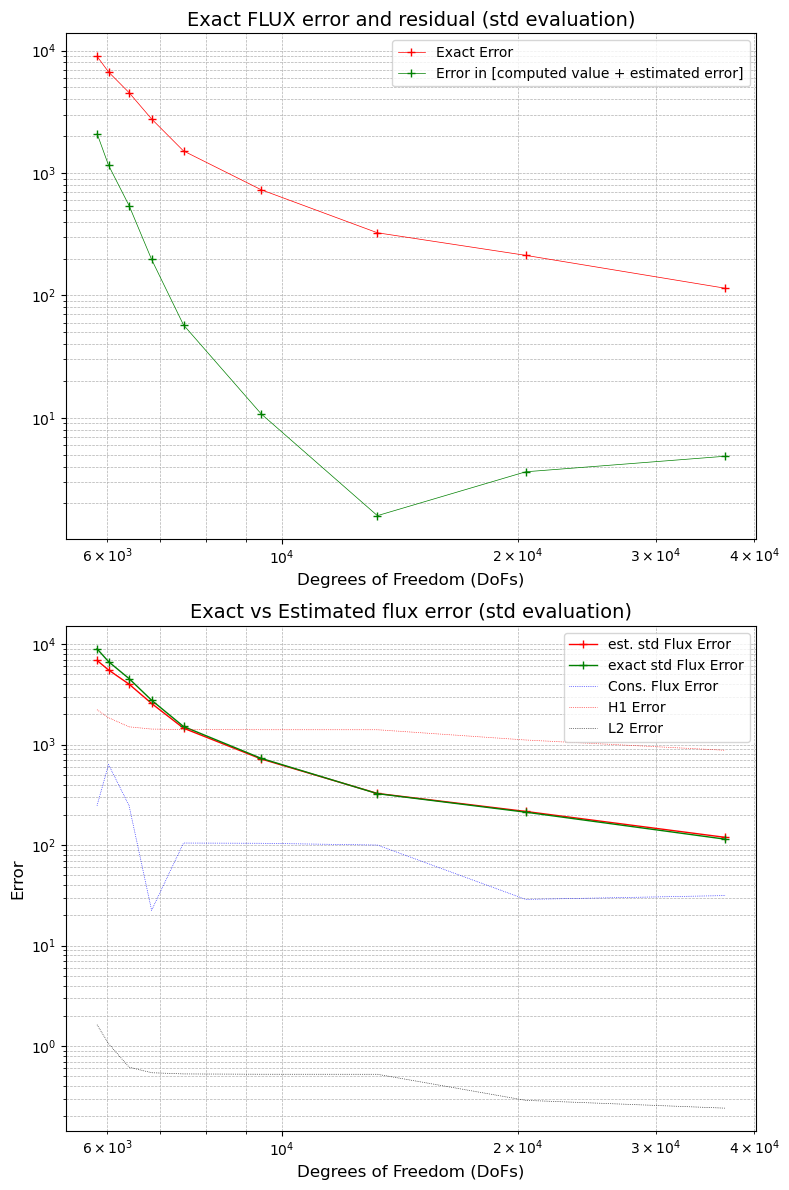

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['std FLUX err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact FLUX error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"r-+", linewidth=1.0, label='est. std Flux Error')
plt.loglog(data['DoFs'], data['std FLUX err'],"g-+", linewidth=1.0, label='exact std Flux Error')
plt.loglog(data['DoFs'], data['Cons. FLUX err'],"b:", linewidth=0.5, label='Cons. Flux Error')
plt.loglog(data['DoFs'], data['H1'],"r:", linewidth=0.5, label='H1 Error')
plt.loglog(data['DoFs'], data['L2'],"k:", linewidth=0.5, label='L2 Error')



plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated flux error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
